In [1]:
import sklearn
print (sklearn.__version__)

0.20.0


In [2]:
#imports
#numpy, pandas, scipy,math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
svc = SVC()

In [3]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()
del rawData ['ID']
rawData.rename(columns = {'default payment next month':'default'}, inplace=True)

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


variableName = dataframe.iloc[rows,columns]
variableName = dataframe['coumnName']
variableName = dataframe.iloc[:,0:4]

In [5]:
#Select the features
#features
features = rawData.iloc[:,0:23]
print('Summary of feature sample')
#features[0:5]
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
#Select dependent variable
#depVar = rawData['PAY_AMT6']
print('Summary of rawData first 6 rows:')
rawData.iloc[0:5,0:23]

Summary of rawData first 6 rows:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
# Set dependent variable
depVar = rawData['default']
depVar[0:5,]

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

#print(np.cov(rawData))

In [8]:
plt.figure(figsize=(15,15)) 
corr = rawData.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

NameError: name 'sns' is not defined

<Figure size 1080x1080 with 0 Axes>

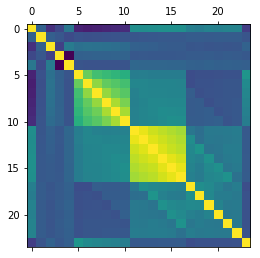

In [9]:
plt.matshow(rawData.corr())

In [10]:
rawData.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [11]:
# See the correlations in descending order
core = rawData.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False).drop_duplicates()

default    default      1.000000
BILL_AMT2  BILL_AMT1    0.951484
BILL_AMT6  BILL_AMT5    0.946197
BILL_AMT4  BILL_AMT5    0.940134
BILL_AMT3  BILL_AMT2    0.928326
           BILL_AMT4    0.923969
BILL_AMT4  BILL_AMT6    0.900941
BILL_AMT2  BILL_AMT4    0.892482
BILL_AMT1  BILL_AMT3    0.892279
BILL_AMT3  BILL_AMT5    0.883910
BILL_AMT4  BILL_AMT1    0.860272
BILL_AMT2  BILL_AMT5    0.859778
BILL_AMT3  BILL_AMT6    0.853320
BILL_AMT2  BILL_AMT6    0.831594
BILL_AMT5  BILL_AMT1    0.829779
PAY_4      PAY_5        0.819835
PAY_5      PAY_6        0.816900
BILL_AMT1  BILL_AMT6    0.802650
PAY_4      PAY_3        0.777359
PAY_3      PAY_2        0.766552
PAY_6      PAY_4        0.716449
PAY_5      PAY_3        0.686775
PAY_0      PAY_2        0.672164
PAY_2      PAY_4        0.662067
PAY_6      PAY_3        0.632684
PAY_2      PAY_5        0.622780
           PAY_6        0.575501
PAY_3      PAY_0        0.574245
PAY_4      PAY_0        0.538841
PAY_0      PAY_5        0.509426
          

In [12]:
#Training Set (Feature Space: X Training)
X_train = (features[: 100000])
X_train_count = len(X_train.index)
print('The number of observations in the Y training set are:',str(X_train_count))
X_train.head()

The number of observations in the Y training set are: 30000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [13]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 100000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 30000


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [14]:
#Testing Set (X Testing)
X_test = features[-3000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 3000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
27000     110000    1          1         2   30      0      0      0      0   
27001      50000    1          2         1   41      0      0      0      0   
27002      20000    1          2         1   40      0      0      0      0   
27003      16000    1          5         1   46      0      0      0      0   
27004      60000    1          1         2   31      0      0      0      0   

       PAY_5    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
27000      2    ...         63100      70391      68661      77511      3000   
27001      0    ...          7471       8043      19526       7564      1200   
27002      0    ...          5622      19263      18433      26132      3010   
27003      0    ...         26965      29521      32032      31385      3000   
27004     -2    ...         51400          0          0       

In [15]:
#Ground Truth (y_test) 
y_test = depVar[-3000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 3000


27000    0
27001    0
27002    0
27003    0
27004    0
Name: default, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [17]:
X_train.shape, X_test.shape

((22500, 23), (7500, 23))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((16875, 23), (5625, 23))

# Build Models

In [29]:
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
svc = SVC()

In [31]:
#Models
modelSVR = SVR()
modelLR = LinearRegression()
modelKNN = KNeighborsClassifier()
modelRF = RandomForestClassifier()
modelGB = GradientBoostingClassifier()
modelLOG = LogisticRegression()
modelSVC = SVC()

In [32]:
model = LinearRegression(n_jobs=10)

In [33]:
#features
#features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [34]:
#dependent variable
#depVar[0:5,]
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64


# Fit Models

In [35]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [36]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
modelLOG.fit(X_train, y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
modelSVC.fit(X_train, y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
modelGB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [40]:
#Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
 # Random Forest Model Fitting and Scoring
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80106667 0.8064     0.79857778]


0.980562962962963

In [42]:
#Support Vector Regression Model Fitting and Scoring
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.p

[-0.02442784 -0.01514749 -0.01894178]


0.9296906710000343

In [43]:
#Linear Regression Model Fitting and Scoring
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.10802019 0.11522248 0.11303545]


0.1149760342350342

In [44]:
# Model fitting - GB
modelGB.fit(X_train, y_train)
print(cross_val_score(modelGB, X_train, y_train))
modelGB.score(X_train, y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81706667 0.82168889 0.81831111]


0.8278518518518518

In [45]:
# Model fitting - SVC
modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train, y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.p

[0.77884444 0.77991111 0.78008889]


0.9950814814814815

In [46]:
# Model fitting - KNN
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.74986667 0.7472     0.75146667]


0.8191407407407407

In [47]:
# Model fitting - LOG
modelLOG.fit(X_train, y_train)
print(cross_val_score(modelLOG, X_train, y_train))
modelLOG.score(X_train, y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sk

[0.77884444 0.77884444 0.77884444]


0.7787851851851851

# Predictions

In [48]:
#Make Predictions RF
predictionsRF = modelRF.predict(X_test)
predRsquaredRF = r2_score(y_test,predictionsRF)
rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared: %.3f' % predRsquaredRF)
print('RMSE: %.3f' % rmseRF)

R Squared: -0.119
RMSE: 0.445


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Make predictions - RF
predictionsRF = modelRF.predict(X_test)
predAccuracyRF = accuracy_score(y_test, predictionsRF)
print(classification_report(y_test, predictionsRF))
print('Random Forest Metrics:')
print('Accurancy: %.3f' % predAccuracyRF)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4336
           1       0.63      0.33      0.43      1289

   micro avg       0.80      0.80      0.80      5625
   macro avg       0.73      0.64      0.66      5625
weighted avg       0.78      0.80      0.78      5625

Random Forest Metrics:
Accurancy: 0.802


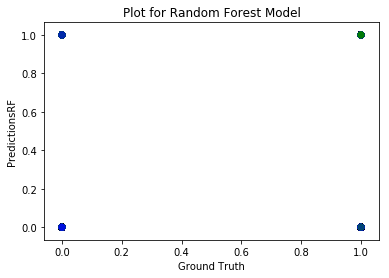

In [55]:
plt.scatter(y_test, predictionsRF, color=['blue','green'], alpha = 0.5)
plt.title('Plot for Random Forest Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsRF')
plt.show();

In [56]:
# Make predictions - GB
predictionsGB = modelGB.predict(X_test)
predAccuracyGB = accuracy_score(y_test, predictionsGB)
print(classification_report(y_test, predictionsGB))
print('GB Metrics:')
print('Accuracy: %.3f' % predAccuracyGB)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4336
           1       0.70      0.37      0.49      1289

   micro avg       0.82      0.82      0.82      5625
   macro avg       0.77      0.66      0.69      5625
weighted avg       0.80      0.82      0.80      5625

GB Metrics:
Accuracy: 0.819


In [57]:
#Make Predictions GB
predictionsGB = modelGB.predict(X_test)
predRsquaredGB = r2_score(y_test,predictionsGB)
rmseGB = sqrt(mean_squared_error(y_test, predictionsGB))
print('R Squared: %.3f' % predRsquaredGB)
print('RMSE: %.3f' % rmseGB)

R Squared: -0.025
RMSE: 0.425


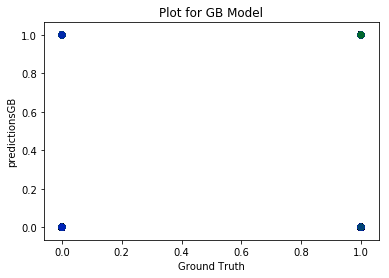

In [58]:
plt.scatter(y_test, predictionsGB, color=['blue','green'], alpha = 0.5)
plt.title('Plot for GB Model')
plt.xlabel('Ground Truth')
plt.ylabel('predictionsGB')
plt.show();

In [59]:
# Make predictions - SVC
predictionsSVC = modelSVC.predict(X_test)
predAccuracySVC = accuracy_score(y_test, predictionsSVC)
print(classification_report(y_test, predictionsSVC))
print('SVC Metrics:')
print('Accuracy: %.3f' % predAccuracySVC)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4336
           1       0.47      0.01      0.03      1289

   micro avg       0.77      0.77      0.77      5625
   macro avg       0.62      0.50      0.45      5625
weighted avg       0.70      0.77      0.68      5625

SVC Metrics:
Accuracy: 0.770


In [60]:
#Make Predictions SVC
predictionsSVC = modelSVC.predict(X_test)
predRsquaredSVC = r2_score(y_test,predictionsSVC)
rmseSVC = sqrt(mean_squared_error(y_test, predictionsSVC))
print('R Squared: %.3f' % predRsquaredSVC)
print('RMSE: %.3f' % rmseSVC)

R Squared: -0.299
RMSE: 0.479


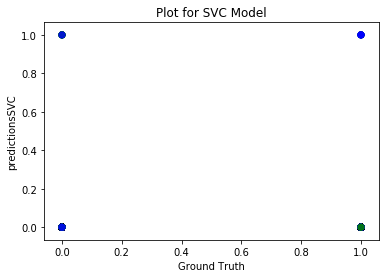

In [61]:
plt.scatter(y_test, predictionsSVC, color=['blue','green'], alpha = 0.5)
plt.title('Plot for SVC Model')
plt.xlabel('Ground Truth')
plt.ylabel('predictionsSVC')
plt.show();

In [62]:
# Make predictions - LOG
predictionsLOG = modelLOG.predict(X_test)
predAccuracyLOG = accuracy_score(y_test, predictionsLOG)
print(classification_report(y_test, predictionsLOG))
print('LOG Metrics:')
print('Accuracy: %.3f' % predAccuracyLOG)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4336
           1       0.00      0.00      0.00      1289

   micro avg       0.77      0.77      0.77      5625
   macro avg       0.39      0.50      0.44      5625
weighted avg       0.59      0.77      0.67      5625

LOG Metrics:
Accuracy: 0.771


/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
#Make Predictions SVC
predictionsLOG = modelSVC.predict(X_test)
predRsquaredLOG = r2_score(y_test,predictionsLOG)
rmseLOG = sqrt(mean_squared_error(y_test, predictionsLOG))
print('R Squared: %.3f' % predRsquaredLOG)
print('RMSE: %.3f' % rmseLOG)

R Squared: -0.299
RMSE: 0.479


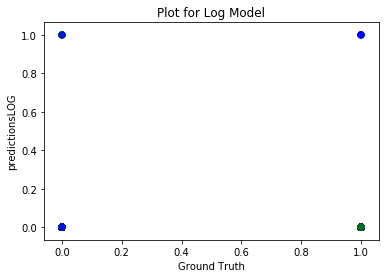

In [64]:
plt.scatter(y_test, predictionsLOG, color=['blue','green'], alpha = 0.5)
plt.title('Plot for Log Model')
plt.xlabel('Ground Truth')
plt.ylabel('predictionsLOG')
plt.show();

In [65]:
# Make predictions - KNN
predictionsKNN = modelKNN.predict(X_test)
predAccuracyKNN = accuracy_score(y_test, predictionsKNN)
print(classification_report(y_test, predictionsKNN))
print('KNN Metrics:')
print('Accuracy: %.3f' % predAccuracyKNN)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      4336
           1       0.38      0.19      0.25      1289

   micro avg       0.74      0.74      0.74      5625
   macro avg       0.59      0.55      0.55      5625
weighted avg       0.70      0.74      0.71      5625

KNN Metrics:
Accuracy: 0.744


In [66]:
#Make Predictions KNN
predictionsKNN = modelKNN.predict(X_test)
predRsquaredKNN = r2_score(y_test,predictionsKNN)
rmseKNN = sqrt(mean_squared_error(y_test, predictionsKNN))
print('R Squared: %.3f' % predRsquaredKNN)
print('RMSE: %.3f' % rmseKNN)

R Squared: -0.449
RMSE: 0.506


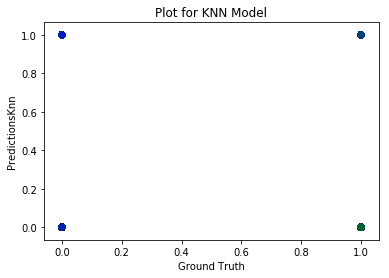

In [67]:
plt.scatter(y_test, predictionsKNN, color=['blue','green'], alpha = 0.5)
plt.title('Plot for KNN Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsKnn')
plt.show();

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [69]:
#Make Predictions LR
predictionsLR = modelLR.predict(X_test)
predRsquaredLR = r2_score(y_test,predictionsLR)
rmseLR = sqrt(mean_squared_error(y_test, predictionsLR))
print('R Squared: %.3f' % predRsquaredLR)
print('RMSE: %.3f' % rmseLR)

R Squared: 0.131
RMSE: 0.392


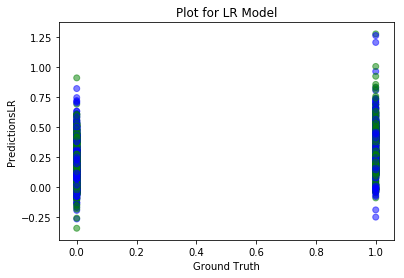

In [70]:
plt.scatter(y_test, predictionsLR, color=['blue','green'], alpha = 0.5)
plt.title('Plot for LR Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsLR')
plt.show();

In [73]:
#Make Predictions SVR
predictionsSVR = modelSVR.predict(X_test)
predRsquaredSVR = r2_score(y_test,predictionsSVR)
rmseSVR = sqrt(mean_squared_error(y_test, predictionsSVR))
print('R Squared: %.3f' % predRsquaredSVR)
print('RMSE: %.3f' % rmseSVR)

R Squared: -0.017
RMSE: 0.424


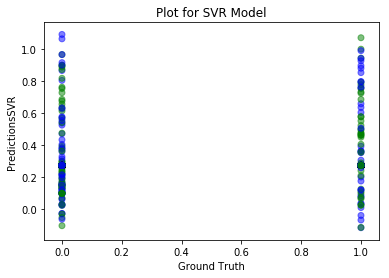

In [74]:
plt.scatter(y_test, predictionsSVR, color=['blue','green'], alpha = 0.5)
plt.title('Plot for SVR Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsSVR')
plt.show();